In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Optional: set style
sns.set(style="whitegrid")

# Read the Data into a DataFrame

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Display Top 5 Rows of The Dataset

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Display Bottom 5 Rows of The Dataset

In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Observe The Shape of The Data 

In [5]:
df.shape

(200, 5)

In [6]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 200
Number of Columns 5


# Dataset Information (Total Number Rows, Total Number of Columns, Datatypes of Each Column and Memory Requirement)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Check Null Values in The Dataset

In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- We can see that our dataset is complete without any missing values.

# Overall Statistics About The Dataset

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

## Histogram of Features

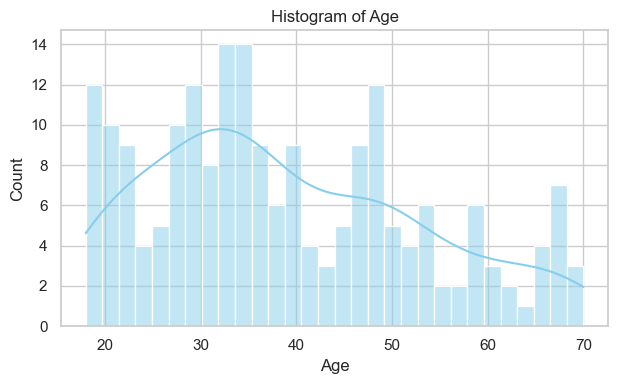

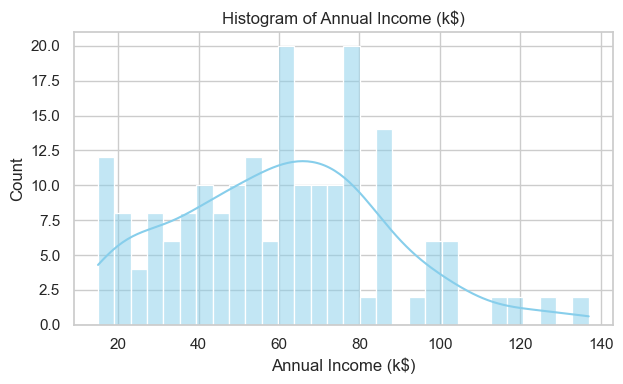

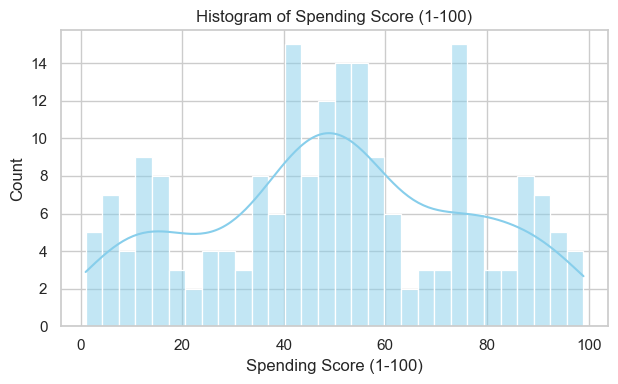

In [10]:
# Loop through numeric columns

df_hist = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
for col in df_hist.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

## Boxplot of Features

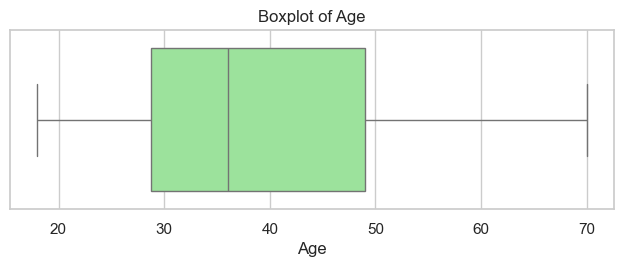

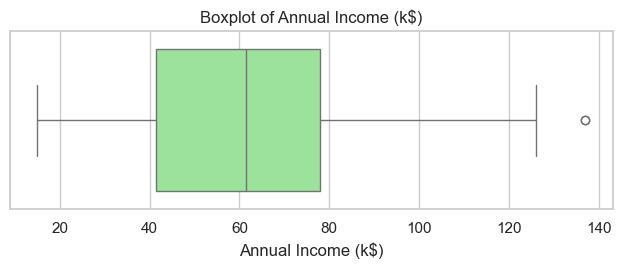

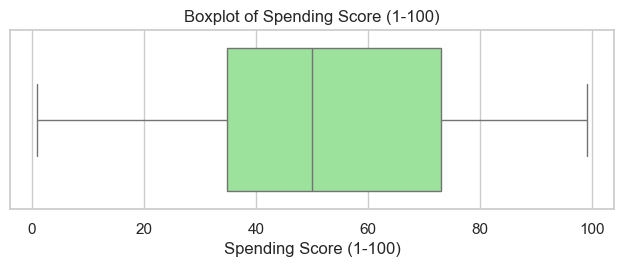

In [11]:
for col in df_hist.select_dtypes(include='number').columns:
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

## Correlation Analysis

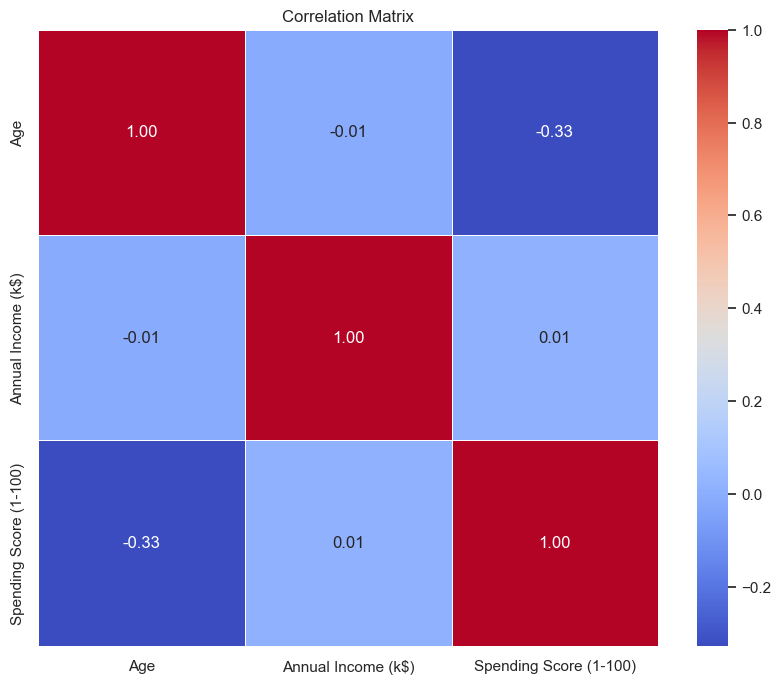

In [12]:
# Step 2: Compute correlation matrix
corr_matrix = df_hist.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

- We want to perform a clustering algorithm based on two features ('Annual Income (k$)','Spending Score (1-100)') only.

This is an example of behavioral segmentation, specifically based on customer purchasing behavior and spending capacity.

- Annual Income (k$) → a proxy for economic capacity

- Spending Score (1-100) → a measure of customer engagement or spending behavior

Together, these features help group customers by how much they can and do spend.

In [14]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

# Elbow Method To Find Optimal Number of Clusters

In [15]:
wcss = []

for k in range(1, 11):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [16]:
wcss

[269981.27999999997,
 183653.32894736843,
 106348.37306211119,
 73679.78903948836,
 44454.47647967974,
 38788.45862332113,
 31631.182088744587,
 29021.453935919155,
 21932.39204424098,
 21595.595064935067]

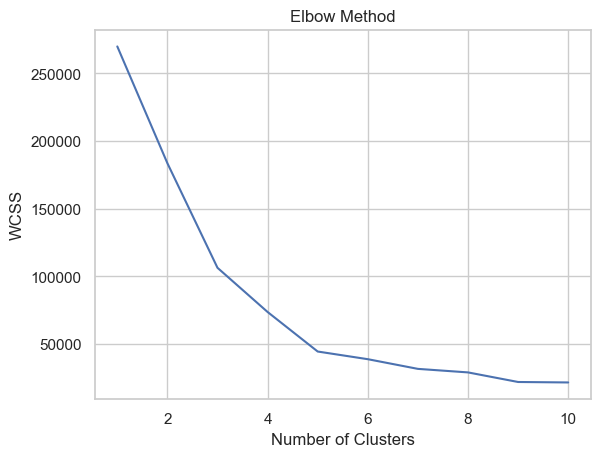

In [17]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# KMeans Clustering

In [18]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [19]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit_predict(X)

In [20]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

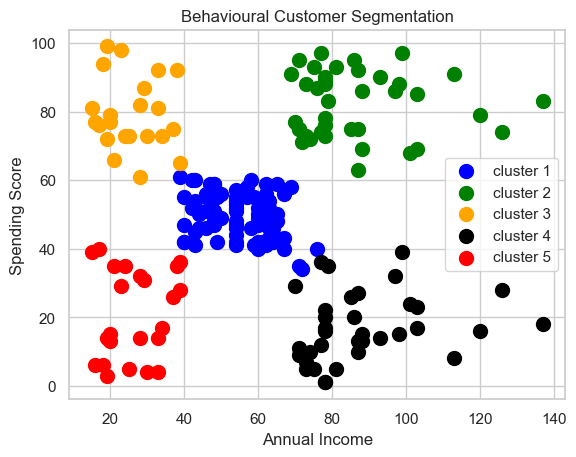

In [21]:
plt.scatter(X.iloc[y_means==0,0], X.iloc[y_means==0,1], s = 100, c = 'blue', label = 'cluster 1')
plt.scatter(X.iloc[y_means==1,0], X.iloc[y_means==1,1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(X.iloc[y_means==2,0], X.iloc[y_means==2,1], s = 100, c = 'orange', label = 'cluster 3')
plt.scatter(X.iloc[y_means==3,0], X.iloc[y_means==3,1], s = 100, c = 'black', label = 'cluster 4')
plt.scatter(X.iloc[y_means==4,0], X.iloc[y_means==4,1], s = 100, c = 'red', label = 'cluster 5')
plt.title("Behavioural Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [22]:
k_means.predict([[15,39]])

/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

# Save The Model 

In [23]:
import joblib

In [24]:
joblib.dump(k_means, "Behavioral_Customer_Segmentation")

['Behavioral_Customer_Segmentation']

In [25]:
model = joblib.load('Behavioral_Customer_Segmentation')

In [26]:
model.predict([[15,39]])

/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

# GUI

In [27]:
from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())

        model = joblib.load('Behavioral_Customer_Segmentation')
        result = model.predict([[p1, p2]])
        print("This customer belongs to cluster no:", result[0])

        messages = {
            0: "Customers with medium annual income and medium annual spend",
            1: "Customers with high annual income and high annual spend",
            2: "Customers with low annual income but high annual spend",
            3: "Customers with high annual income but low annual spend",
            4: "Customers with low annual income and low annual spend"
        }

        result_label.config(text=messages.get(result[0], "Unknown cluster"))

    except ValueError:
        result_label.config(text="Please enter valid numbers in both fields.")

# Set up the window
master = Tk()
master.title("Behavioral Customer Segmentation Using Machine Learning")

# Title label
Label(master, text="Customer Segmentation Using Machine Learning", 
      bg="black", fg="white").grid(row=0, columnspan=2, pady=10)

# Input labels and fields
Label(master, text="Annual Income").grid(row=1, sticky=W)
Label(master, text="Spending Score").grid(row=2, sticky=W)

e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
Button(master, text="Predict", command=show_entry_fields).grid(row=3, columnspan=2, pady=10)

# Result label placeholder (initially empty)
result_label = Label(master, text="", fg="white", font=('Arial', 16, 'bold'))
result_label.grid(row=4, columnspan=2)

# Start the GUI
mainloop()

/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster no: 1


/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster no: 3


/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster no: 3


/opt/anaconda3/envs/Alx_python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster no: 3
